## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [2]:
# Use this cell to begin your analysis, and add as many as you would like!
import matplotlib.pyplot as plt
import pandas as pd

office = pd.read_csv('datasets/office_episodes.csv')
office['color_ratings'] = office['scaled_ratings'].apply(
    lambda r: 'red' if r < 0.25 else
    ('orange' if r >= 0.25 and r < 0.5 else
     ('lightgreen' if r >= 0.5 and r < 0.75 else 'darkgreen')
     )
)

In [3]:
office['sized_system'] = office['has_guests'].apply(
    lambda g: 250 if g else 25)

In [4]:
office_guests = office[office['has_guests'] == True]
office_no_guests = office[office['has_guests'] == False]

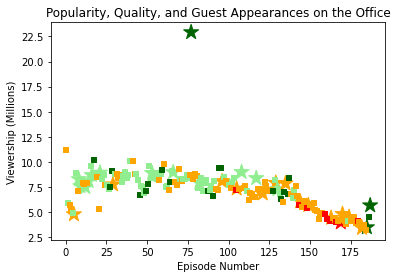

In [5]:
# Create a scatter plot of the data from the DataFrame cellphone
fig, ax = plt.subplots()


colors_classes = ['Ratings < 0.25',
                  'Ratings >= 0.25 and < 0.50',
                  'Ratings >= 0.50 and < 0.75',
                  'Ratings >= 0.75']

ax.scatter(office_guests.episode_number, office_guests.viewership_mil,
            color=office_guests.color_ratings,
            marker='*',
            s=office_guests.sized_system)

scatter = ax.scatter(office_no_guests.episode_number, office_no_guests.viewership_mil,
            color=office_no_guests.color_ratings,
            marker='s',
            s=office_no_guests.sized_system)

# Add labels
plt.ylabel('Viewership (Millions)')
plt.xlabel('Episode Number')

plt.title('Popularity, Quality, and Guest Appearances on the Office')

plt.rcParams['figure.figsize'] = [11, 7]

#add legend with class names
"""
legend = ax.legend(*scatter.legend_elements(),
                   labels=colors_classes,
                   loc="upper right",
                   title="Color Ratings")

ax.add_artist(legend)
"""

# Display the plot
plt.show()

In [6]:
top_star_row = office[office['viewership_mil'] == office['viewership_mil'].max()]
top_star = top_star_row['guest_stars'].values.tolist()[0].strip().split(',')[0]

In [7]:
print(top_star_row['guest_stars'])

77    Cloris Leachman, Jack Black, Jessica Alba
Name: guest_stars, dtype: object
